# Exercise sets table analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#All-of-the-data" data-toc-modified-id="All-of-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All of the data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Data-distribution-evaluation" data-toc-modified-id="Data-distribution-evaluation-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data distribution evaluation</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li><li><span><a href="#Changed-data" data-toc-modified-id="Changed-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Changed data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Data-distribution-evaluation" data-toc-modified-id="Data-distribution-evaluation-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Data distribution evaluation</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li></ul></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></div>

## Introduction

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

exercise_sets = pd.read_csv('/home/evida-monika/mhunters/exercise_sets.csv', on_bad_lines='skip', low_memory=False)
exercise_sets2 = exercise_sets.drop(['intensity_modificator', 'track_reps'], axis = 1)

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

In [6]:
col_date = ['created_at', 'updated_at']

for col in col_date:
    exercise_sets2[col] = pd.to_datetime(exercise_sets2[col])#.dt.strftime("%Y-%m-%d %H:%M:%S")

exercise_sets2['order'] = exercise_sets2['order'].astype('category')

In this document there will be statistical analysis of Exercise sets table. 
Exercise sets table has 8 variables (columns) and 40838 records. 
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information about this dataset and glimpse of the data.

In [7]:
exercise_sets2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40838 entries, 0 to 40837
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              40838 non-null  int64         
 1   session_set_id  40838 non-null  int64         
 2   exercise_id     40838 non-null  int64         
 3   order           40838 non-null  category      
 4   time_duration   40394 non-null  float64       
 5   reps            40325 non-null  float64       
 6   created_at      40838 non-null  datetime64[ns]
 7   updated_at      40838 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(2), int64(3)
memory usage: 2.2 MB


In [3]:
exercise_sets2.head()

,id,session_set_id,exercise_id,order,time_duration,reps,created_at,updated_at
0,1,5,5289,1,0.00,15.00,2020-10-23 13:53:44.337776,2020-10-23 13:53:44.337776
1,2,5,5218,2,0.00,30.00,2020-10-23 13:53:44.351294,2020-10-23 13:53:44.351294
2,3,5,5245,3,0.00,20.00,2020-10-23 13:53:44.365517,2020-10-23 13:53:44.365517
3,4,5,5293,4,0.00,5.00,2020-10-23 13:53:44.378357,2020-10-23 13:53:44.378357
4,5,6,5289,1,0.00,15.00,2020-10-23 13:53:44.411764,2020-10-23 13:53:44.411764


In this dataset there are columns that are connections to other tables like:

* *exercise_id* - id of exercise from *Exercises* table,
* *session_set_id* - id of session set from *session_sets* (in which set of session was the exercise done).

The other variables are:

* *order* - what number of order in the set has an exercise,
* *time_duration* - how many seconds the exercise supposed to be done (it is applied when exercise id for time value, for example - plank),
* *reps* - how many times the person supposed to do the exercise,
* *created_at*, *updated_at* - date when was the exercise set report created and last updated.




## Numerical data

Even though *exercise_id* and *session_set_id* are "numerical" data, but they can't be treated that way, because they are ID values for other tables. So here, only 

* *time_duration* and
* *reps*

will be taken as numerical values.

### All of the data

#### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [9]:
num_t = exercise_sets2.loc[:, ['reps', 'time_duration']]
num_t_desc = num_t.describe()
num_t_desc = num_t_desc.transpose()
num_t_desc["var"] = num_t.var()
num_t_desc["skewness"] = num_t.skew()
num_t_desc["kurtosis"] = num_t.kurtosis()
num_t_desc["NULL count"] = num_t.isna().sum()
num_t_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
reps,40325.00,6.56,11.88,0.00,0.00,0.00,10.00,146.00,141.09,3.30,12.93,513
time_duration,40394.00,18.12,25.95,0.00,0.00,10.00,30.00,480.00,673.29,2.79,18.78,444


Taking into consideration all of the data, mean for planned reps is 6.5 (SD 12), median is 0 (IQR 0 - 10) and maximum value of reps is 146. Mean for planned time_duration of the exercise in set is 18 seconds (SD 26), median is 10 seconds (IQR 0 - 30) and maximum value is 480 seconds.

#### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there is a histogram of the MET values.

Below there are histograms.

Text(0.5, 0.98, 'Histogram for numeric variables')

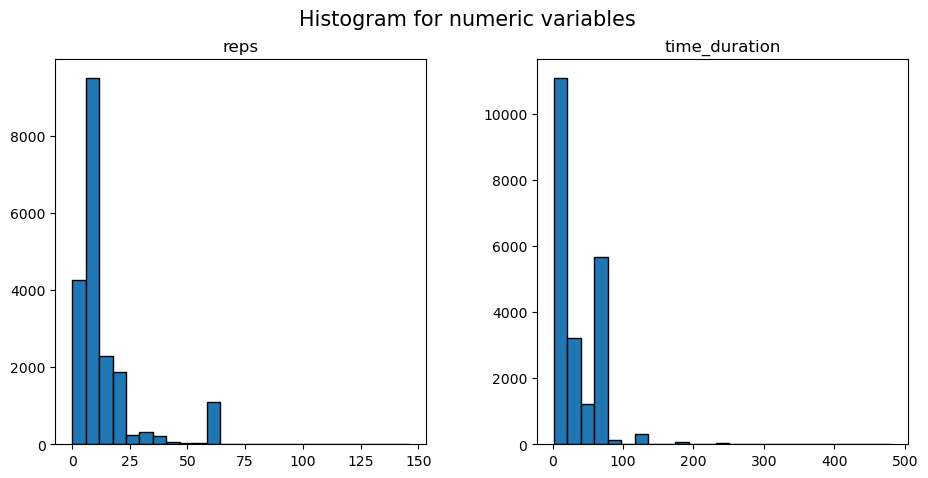

In [14]:
num_t.hist(layout=(1,2), grid = False, bins = 25, edgecolor='black', figsize=(11,5))
plt.suptitle('Histogram for numeric variables', fontsize = 15)

Below there are qqplots.

Text(0.5, 1.05, 'QQ plots for numeric variables')

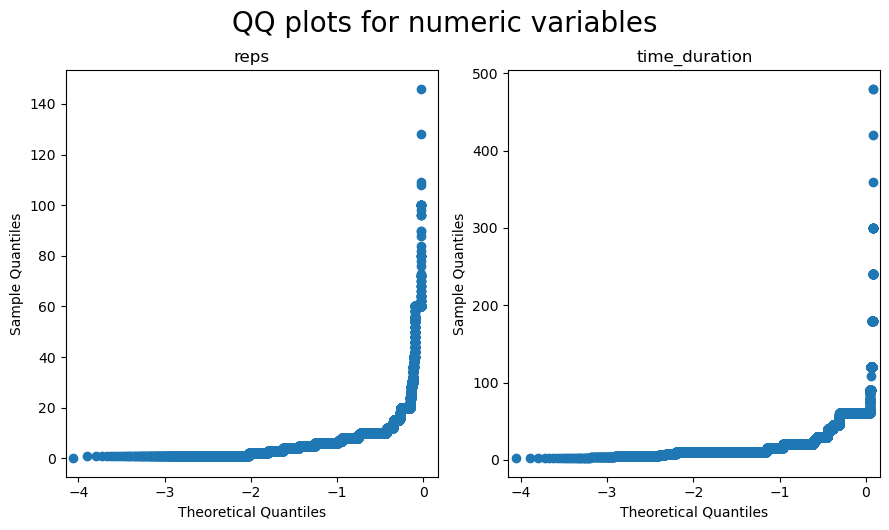

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(9, 5))
for k, ax in zip(num_t.columns, np.ravel(axes)):

        sm.qqplot(num_t[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for numeric variables', fontsize = 20, y = 1.05)

And last, but not least, below there is the table with Shapiro-Wilk test statistics.

In [18]:
normal = pg.normality(num_t, method='shapiro').round(3)
normal

,W,pval,normal
reps,0.65,0.00,False
time_duration,0.74,0.00,False


From histograms, qqplots and Shapiro-Wilk normality tests show that there is no normality in the data. Kutosis and skewness also confirms it.

#### Data distribution evaluation

In this section, unfortunately, data distribution will not be checked, because after deleting all of the NULL observations there would only 930 observations out of 40838, so the fitted distributions wouldn't be correct.

#### Outliers detection

The outliers detection will be done as soon as definition of an outlier will be specified.

### Changed data

Changed data taken into consideration is only the data when reps or time_duration are greater than 0 (for example, when reps are 0, then we take only time duration), only then the data is not null.

In [10]:
num_t2 = num_t

In [12]:
for i in range(0, len(num_t2)):
    if (num_t2['reps'][i] > 0 and num_t2['time_duration'][i] == 0):
        num_t2['time_duration'][i] = np.NaN
    elif (num_t2['reps'][i] == 0 and num_t2['time_duration'][i] > 0):
        num_t2['reps'][i] = np.NaN
    elif (num_t2['reps'][i] == 0 and num_t2['time_duration'][i] == 0):
        num_t2['reps'][i] = np.NaN
        num_t2['time_duration'][i] = np.NaN

#### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [13]:
num_t2_desc = num_t2.describe()
num_t2_desc = num_t2_desc.transpose()
num_t2_desc["var"] = num_t2.var()
num_t2_desc["skewness"] = num_t2.skew()
num_t2_desc["kurtosis"] = num_t2.kurtosis()
num_t2_desc["NULL count"] = num_t2.isna().sum()
num_t2_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
reps,20030.00,13.20,14.01,0.00,6.00,10.00,15.00,146.00,196.30,2.62,7.15,20808
time_duration,21734.00,33.68,26.97,2.00,15.00,20.00,60.00,480.00,727.36,2.96,22.58,19104


Now, the data has some NULL values, but they really should reflect reps and time duration. Mean for reps planned increased from 6.5 reps (SD 12) to 13 reps (SD 14), median increased from 0 reps (IQR 0 - 10) to 10 reps (IQR 6 - 15) and maximum stayed the same as before - at 146 reps. Mean planned time_duration increased from 18 seconds (SD 26) to 34 seconds (SD 27), median also increased from 10 seconds (IQR 0 - 30) to 20 seconds (IQR 15 - 60) and maximum stayed the same - at 480 seconds.

#### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there is a histogram of the MET values.

Below there are histograms.

Text(0.5, 0.98, 'Histogram for numeric variables')

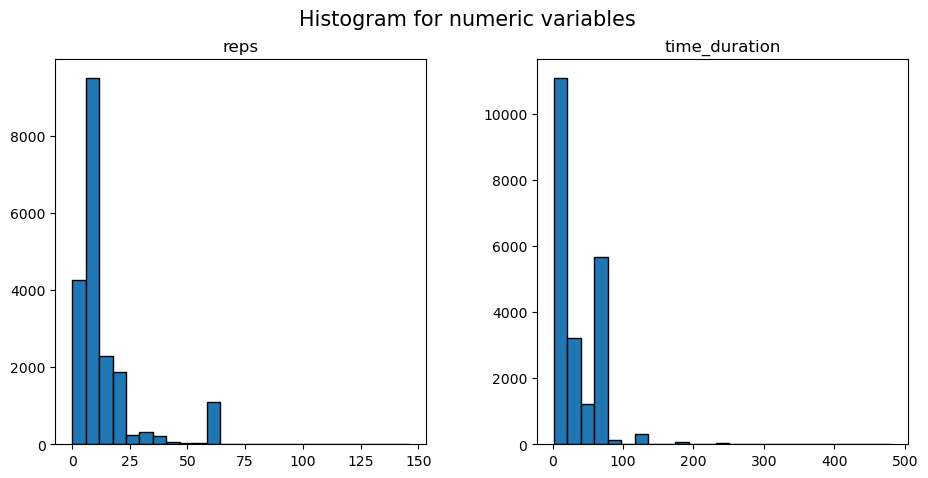

In [15]:
num_t2.hist(layout=(1,2), grid = False, bins = 25, edgecolor='black', figsize=(11,5))
plt.suptitle('Histogram for numeric variables', fontsize = 15)

Below there are qqplots.

Text(0.5, 1.05, 'QQ plots for numeric variables')

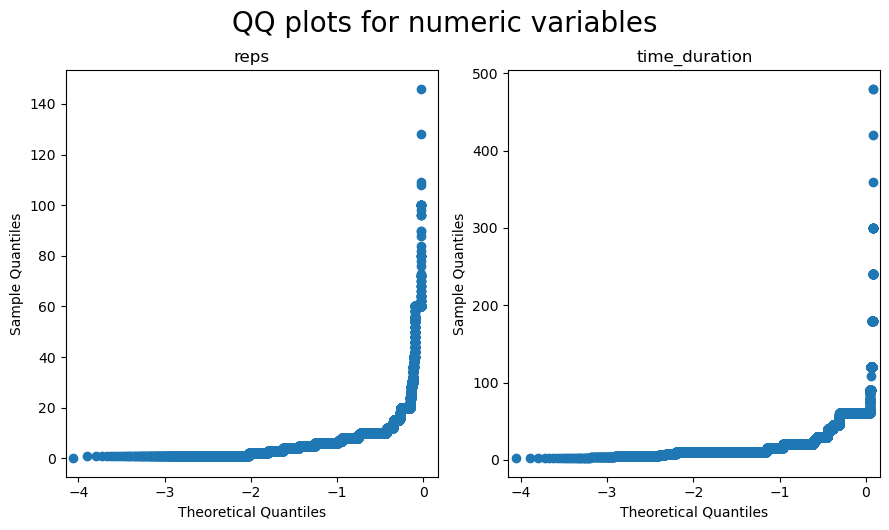

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(9, 5))
for k, ax in zip(num_t2.columns, np.ravel(axes)):

        sm.qqplot(num_t2[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for numeric variables', fontsize = 20, y = 1.05)

And last, but not least, below there is the table with Shapiro-Wilk test statistics.

In [19]:
normal = pg.normality(num_t2, method='shapiro').round(3)
normal

,W,pval,normal
reps,0.65,0.00,False
time_duration,0.74,0.00,False


From histograms, qqplots and Shapiro-Wilk normality tests show that there is no normality in the data. Kutosis and skewness also confirms it.

#### Data distribution evaluation

In this subset there is no sense to look for data distribution, because available function doesn't count NULL values and without them, most of the data will be gone, and the distribution wouldn't reflect the real data.

#### Outliers detection

The outliers detection will be done as soon as definition of an outlier will be specified.

## Categorical data

It is possible to count *order* variable as categorical variable. 

In [29]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

Below there is a frequency table of orders. It says how many exercises supposed to be done in each order number.

In [30]:
my_freq_table(exercise_sets2, 'order').sort_values(by = 'Frequency', ascending = False)

,Frequency,Percent
Total,40838,100.0%
1,11569,28.33%
2,10848,26.56%
3,6105,14.95%
4,3990,9.77%
5,2091,5.12%
6,1651,4.04%
7,1092,2.67%
8,585,1.43%
9,439,1.07%


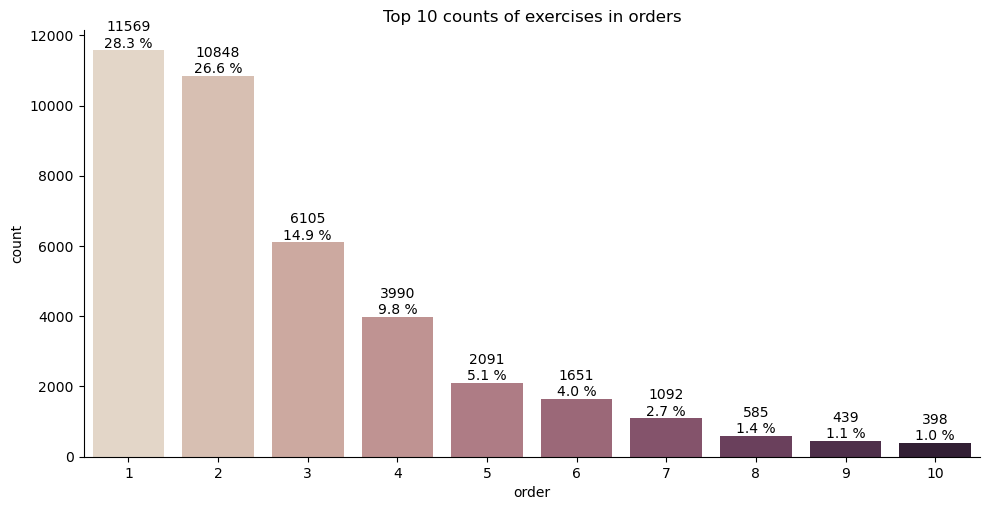

In [31]:
total = exercise_sets['order'].count()
g = sns.catplot(data=exercise_sets, x='order', kind="count", palette="ch:.20",
                order=exercise_sets.order.value_counts().iloc[:10].index, 
                height=5, aspect=2).set(title = 'Top 10 counts of exercises in orders')

#g.set_xticklabels(rotation = 90)

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Most exercises supposed to be done in first order of the set (28%), 27% of exercises in sets supposed to be in second order, 15% in third, 10% in fourth and 5% in fifth.